In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/PROJET UNIKIN/data.csv')
data.head()

,col4,sentiment,classified_sentiments
0,Bon les ukthy niqab profitez du coronavirus po...,Négatif,Négatif
1,@iammartinmatin Le corona virus peut se transm...,Négatif,Négatif
2,Coronavirus : les masques de protection en rup...,Négatif,Négatif
3,#Coronavirus : les masques en rupture de stock...,négatif,Négatif
4,Coronavirus : les masques de protection en rup...,Négatif,Négatif


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bonnes_classifications.csv to bonnes_classifications (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv('bonnes_classifications.csv')
df.head()

,col4,sentiment,classified_sentiments
0,Bon les ukthy niqab profitez du coronavirus po...,Négatif,Négatif
1,@iammartinmatin Le corona virus peut se transm...,Négatif,Négatif
2,Coronavirus : les masques de protection en rup...,Négatif,Négatif
3,Coronavirus : les masques de protection en rup...,Négatif,Négatif
4,Coronavirus : On a t d valis s en une journ e ...,Négatif,Négatif


In [ ]:
df.drop(columns=['sentiment'], inplace=True)

In [ ]:
df['classified_sentiments'].value_counts(normalize = True)

,proportion
classified_sentiments,
Négatif,0.398013
Positif,0.397136
Neutre,0.204851


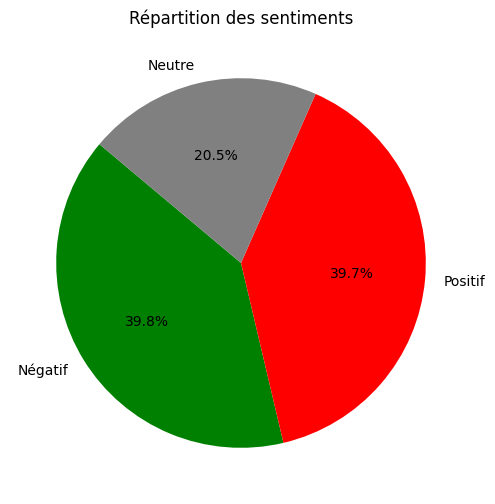

In [ ]:
import matplotlib.pyplot as plt

classified_sentiments = ['Négatif', 'Positif', 'Neutre']
valeurs = [39.8, 39.7, 20.5 ]

colors = ['#008000', '#FF0000', '#808080']


plt.figure(figsize=(8, 6))
plt.pie(valeurs, labels=classified_sentiments, colors=colors, autopct='%1.1f%%', startangle=140)

plt.title('Répartition des sentiments')

plt.show()

In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
Négatif,1362
Positif,1359
Neutre,701


In [ ]:
df.shape

(3422, 3)

<ipython-input-5-65ecab20825b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='classified_sentiments', data=df, palette=palette)


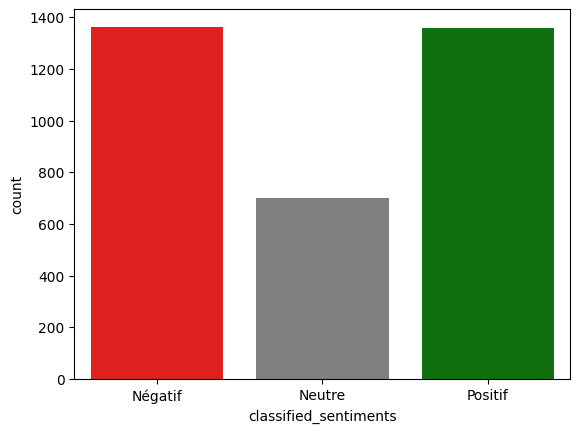

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Définir une palette de couleurs pour chaque catégorie
palette = {"Positif": "green", "Négatif": "red", "Neutre": "grey"}

# Créer l'histogramme avec la palette de couleurs personnalisée
sns.countplot(x='classified_sentiments', data=df, palette=palette)

# Afficher le graphique
plt.show()


In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Import the Tokenizer class from tensorflow.keras.preprocessing.text
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#Import train_test_split
from sklearn.model_selection import train_test_split

# Télécharger les datasets nécessaires
nltk.download('wordnet')
nltk.download('stopwords')

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('french') + stopwords.words('english'))  # Adaptez à la langue de vos tweets

def clean_tweet(tweet):
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)  # Supprime les URL
    tweet = re.sub(r"@\w+|#\w+", '', tweet)  # Supprime les mentions et hashtags
    tweet = re.sub(r"[^a-zA-Z]", ' ', tweet)  # Supprime les caractères spéciaux
    tweet = tweet.lower()
    words = tweet.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

df["col4"] = df["col4"].apply(clean_tweet)

from imblearn.over_sampling import SMOTE

tweets = df['col4']
labels = df['classified_sentiments']

# Vectorisation des Tweets avec TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(tweets).toarray()

# Prétraitement pour CNN
tokenizer = Tokenizer(num_words=5000) # Now Tokenizer is defined and can be used
tokenizer.fit_on_texts(tweets)
X_seq = tokenizer.texts_to_sequences(tweets)
X_seq = pad_sequences(X_seq, maxlen=100)  # Ajuste le maxlen selon tes besoins

# Encodage des Labels
label_mapping = {'Négatif': 0, 'Neutre': 1, 'Positif': 2}
y = labels.map(label_mapping)

# Équilibrage des Données avec SMOTE
smote = SMOTE(random_state=42)
X_tfidf_balanced, y_balanced = smote.fit_resample(X_tfidf, y)
X_seq_balanced, _ = smote.fit_resample(X_seq, y)

# Séparation des Données
#X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
#X_train_seq, X_test_seq, _, _ = train_test_split(X_seq, y, test_size=0.2, random_state=42)

# Séparation des Données
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf_balanced, y_balanced, test_size=0.2, random_state=0)
X_train_seq, X_test_seq, _, _ = train_test_split(X_seq_balanced, y_balanced, test_size=0.2, random_state=42)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Import the GridSearchCV class
from sklearn.model_selection import GridSearchCV

# Optimisation des Hyperparamètres et Entraînement des Modèles
# KNN
from sklearn.neighbors import KNeighborsClassifier # Make sure you import the KNeighborsClassifier

param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train_tfidf, y_train)
knn_best = grid_knn.best_estimator_

In [ ]:
# LightGBM
!pip install lightgbm
import lightgbm as lgb # Import the LightGBM library
from sklearn.model_selection import GridSearchCV

param_grid_lgb = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.3]}
grid_lgb = GridSearchCV(lgb.LGBMClassifier(), param_grid_lgb, cv=5) # Now lgb is defined and can be used
grid_lgb.fit(X_train_tfidf, y_train)
lgb_best = grid_lgb.best_estimator_

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3034
[LightGBM] [Info] Number of data points in the train set: 2614, number of used features: 164
[LightGBM] [Info] Start training from score -1.100144
[LightGBM] [Info] Start training from score -1.088715
[LightGBM] [Info] Start training from score -1.107064
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004755 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3015
[LightGBM] [Info] Number of data points in the train set: 2614, number of used features: 165
[LightGBM] [Info] Start training from score -1.100144
[LightGBM] [Info] Start training from score -1.088715
[LightGBM] [Info] Start training from score -1.107064
[LightGBM] [Info] Auto-choosing ro

In [ ]:
# Import necessary libraries
from tensorflow import keras
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Sequential # Import Sequential from tensorflow.keras.models

# CNN
cnn = Sequential()
cnn.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
cnn.add(Conv1D(64, kernel_size=5, activation='relu'))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(3, activation='softmax'))

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_seq, y_train, epochs=5, batch_size=32, validation_split=0.1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.3339 - loss: 1.1024 - val_accuracy: 0.3761 - val_loss: 1.0995
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.6698 - loss: 1.0637 - val_accuracy: 0.3456 - val_loss: 1.1100
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7968 - loss: 0.7645 - val_accuracy: 0.3731 - val_loss: 1.3336
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8910 - loss: 0.3369 - val_accuracy: 0.3425 - val_loss: 1.5140
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9291 - loss: 0.2046 - val_accuracy: 0.3639 - val_loss: 1.6693


In [ ]:

# Méthode de Vote Pondéré
classifiers = [
    ('knn', knn_best),
   # ('svm', svm_best),
    ('lgb', lgb_best),
    ('cnn', cnn)
]

# Custom Voting Classifier for CNN Integration
class VotingClassifierWithCNN:
    def __init__(self, classifiers):
        self.classifiers = classifiers

    def predict(self, X_tfidf, X_seq):
        pred_knn = self.classifiers[0][1].predict(X_tfidf)
        pred_svm = self.classifiers[1][1].predict(X_tfidf)
        pred_lgb = self.classifiers[2][1].predict(X_tfidf)
        pred_cnn = np.argmax(self.classifiers[3][1].predict(X_seq), axis=-1)

        # Combining predictions with majority vote
        pred_ensemble = np.vstack((pred_knn, pred_svm, pred_lgb, pred_cnn)).T
        final_pred = [np.bincount(row).argmax() for row in pred_ensemble]
        return np.array(final_pred)

# Entraînement du modèle d'ensemble
ensemble_model = VotingClassifierWithCNN(classifiers)

# Prédictions sur les données de test
y_pred_ensemble = ensemble_model.predict(X_test_tfidf, X_test_seq)

# Évaluation
print("Ensemble Model - Test")
print(classification_report(y_test, y_pred_ensemble))
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
disp_ensemble = ConfusionMatrixDisplay(confusion_matrix=cm_ensemble)
disp_ensemble.plot(cmap='Blues')
plt.title('Matrice de confusion pour le modèle d\'ensemble')
plt.show()


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


201/201 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.3358 - loss: 1.1004 - val_accuracy: 0.3497 - val_loss: 1.0976
Epoch 2/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5373 - loss: 1.0427 - val_accuracy: 0.3259 - val_loss: 1.1672
Epoch 3/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7895 - loss: 0.6457 - val_accuracy: 0.3259 - val_loss: 1.4851
Epoch 4/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.8833 - loss: 0.3459 - val_accuracy: 0.3161 - val_loss: 1.7501
Epoch 5/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9094 - loss: 0.2543 - val_accuracy: 0.3203 - val_loss: 1.9501


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_1" is incompatible with the layer: expected axis -1 of input shape to have value 3072, but received input with shape (32, 159872)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 5000), dtype=float32)
  • training=False
  • mask=None

In [ ]:

# 2. Définition et Entraînement des Modèles
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_tfidf, y_train)

# SVM
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train_tfidf, y_train)

# LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train_tfidf, y_train)

# CNN
cnn = Sequential()
cnn.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
cnn.add(Conv1D(64, kernel_size=5, activation='relu'))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(3, activation='softmax'))

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_seq, y_train, epochs=5, batch_size=32, validation_split=0.1)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034705 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15258
[LightGBM] [Info] Number of data points in the train set: 6042, number of used features: 519
[LightGBM] [Info] Start training from score -0.937534
[LightGBM] [Info] Start training from score -1.423042
[LightGBM] [Info] Start training from score -1.001228


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.3852 - loss: 1.0867 - val_accuracy: 0.3983 - val_loss: 1.0750
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.4853 - loss: 1.0245 - val_accuracy: 0.4099 - val_loss: 1.0912
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.6454 - loss: 0.8488 - val_accuracy: 0.3587 - val_loss: 1.2041
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.7791 - loss: 0.6213 - val_accuracy: 0.3570 - val_loss: 1.3778
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.8509 - loss: 0.4460 - val_accuracy: 0.3686 - val_loss: 1.5809


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Ensemble Model - Test
              precision    recall  f1-score   support

           0       0.47      0.60      0.53       611
           1       0.31      0.19      0.24       371
           2       0.43      0.41      0.42       529

    accuracy                           0.43      1511
   macro avg       0.40      0.40      0.39      1511
weighted avg       0.42      0.43      0.42      1511



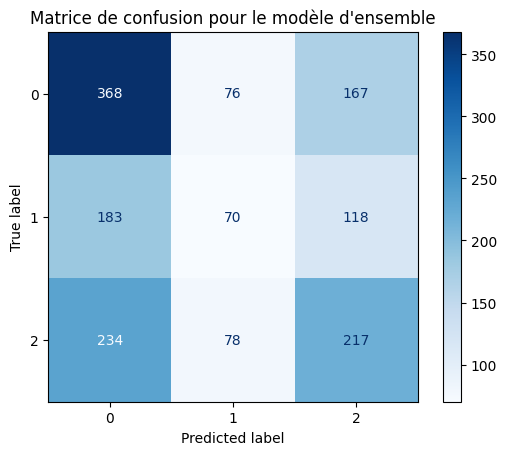

In [ ]:
# 3. Méthode de Vote Pondéré
classifiers = [
    ('knn', knn),
    ('svm', svm),
    ('lgb', lgb_model),
    ('cnn', cnn)
]

# Custom Voting Classifier for CNN Integration
class VotingClassifierWithCNN:
    def __init__(self, classifiers):
        self.classifiers = classifiers

    def predict(self, X_tfidf, X_seq): # Modified to accept both types of input
        pred_knn = self.classifiers[0][1].predict(X_tfidf)
        pred_svm = self.classifiers[1][1].predict(X_tfidf)
        pred_lgb = self.classifiers[2][1].predict(X_tfidf)
        pred_cnn = np.argmax(self.classifiers[3][1].predict(X_seq), axis=-1) # Use X_seq for CNN

        # Combining predictions with majority vote
        pred_ensemble = np.vstack((pred_knn, pred_svm, pred_lgb, pred_cnn)).T
        final_pred = [np.bincount(row).argmax() for row in pred_ensemble]
        return np.array(final_pred)

# Entraînement du modèle d'ensemble
ensemble_model = VotingClassifierWithCNN(classifiers)

# Prédictions sur les données de test
# Pass both X_test_tfidf and X_test_seq to the predict method
y_pred_ensemble = ensemble_model.predict(X_test_tfidf, X_test_seq) # Modified

# Évaluation
print("Ensemble Model - Test")
print(classification_report(y_test, y_pred_ensemble))
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
disp_ensemble = ConfusionMatrixDisplay(confusion_matrix=cm_ensemble)
disp_ensemble.plot(cmap='Blues')
plt.title('Matrice de confusion pour le modèle d\'ensemble')
plt.show()

In [ ]:
# Mélanger les données aléatoirement
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
# Diviser les données en features (X) et target (y)
X = data['col4']
y = data['classified_sentiments']

# Vectorisation des textes pour les modèles SVM, KNN et LightGBM
vectorizer = TfidfVectorizer(max_features=7553)
X_vectorized = vectorizer.fit_transform(X).toarray()

# Division du jeu de données
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=0, stratify=y)



KeyboardInterrupt: 

In [ ]:
# Modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_train_preds = knn_model.predict(X_train)
knn_test_preds = knn_model.predict(X_test)

In [ ]:


# Modèle LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_train_preds = lgb_model.predict(X_train)
lgb_test_preds = lgb_model.predict(X_test)

# Préparation des données pour CNN
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_seq, maxlen=50)

X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_padded, y, test_size=0.2, random_state=42, stratify=y)

# Modèle CNN
cnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=50),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_seq, y_train_seq, epochs=5, batch_size=32, verbose=1)

cnn_train_preds = np.argmax(cnn_model.predict(X_train_seq), axis=1)
cnn_test_preds = np.argmax(cnn_model.predict(X_test_seq), axis=1)

# Évaluation individuelle
print("SVM - Train Confusion Matrix")
print(confusion_matrix(y_train, svm_train_preds))
print("SVM - Test Confusion Matrix")
print(confusion_matrix(y_test, svm_test_preds))

print("KNN - Train Confusion Matrix")
print(confusion_matrix(y_train, knn_train_preds))
print("KNN - Test Confusion Matrix")
print(confusion_matrix(y_test, knn_test_preds))

print("LightGBM - Train Confusion Matrix")
print(confusion_matrix(y_train, lgb_train_preds))
print("LightGBM - Test Confusion Matrix")
print(confusion_matrix(y_test, lgb_test_preds))

print("CNN - Train Confusion Matrix")
print(confusion_matrix(y_train_seq, cnn_train_preds))
print("CNN - Test Confusion Matrix")
print(confusion_matrix(y_test_seq, cnn_test_preds))

# Méthode d'ensemble - Vote pondéré
svm_test_probs = svm_model.predict_proba(X_test)
knn_test_probs = knn_model.predict_proba(X_test)
lgb_test_probs = lgb_model.predict_proba(X_test)
cnn_test_probs = cnn_model.predict(X_test_seq)

# Pondération des probabilités (ajustez les poids selon les performances)
weights = [0.4, 0.2, 0.3, 0.1]
ensemble_probs = (weights[0] * svm_test_probs +
                  weights[1] * knn_test_probs +
                  weights[2] * lgb_test_probs +
                  weights[3] * cnn_test_probs)

ensemble_preds = np.argmax(ensemble_probs, axis=1)

# Matrice de confusion pour la méthode d'ensemble
print("Ensemble - Test Confusion Matrix")
print(confusion_matrix(y_test, ensemble_preds))
print("Ensemble - Classification Report")
print(classification_report(y_test, ensemble_preds))


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, GlobalMaxPooling1D, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Préparation des données pour CNN
max_len = 100
X_train_padded = pad_sequences(X_train_tfidf, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_tfidf, maxlen=max_len, padding='post')

# Construction du modèle CNN
cnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_len),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_padded, y_train, epochs=5, batch_size=32, verbose=1)

# Prédictions
y_pred_cnn = cnn_model.predict(X_test_padded).argmax(axis=1)
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
print(f"Accuracy CNN: {accuracy_cnn}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.3898 - loss: 1.0844
Epoch 2/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.3798 - loss: 1.0845
Epoch 3/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.3752 - loss: 1.0862
Epoch 4/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.3758 - loss: 1.0846
Epoch 5/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.3989 - loss: 1.0768
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Accuracy CNN: 0.4043679682329583


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Entraînement du modèle
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train_tfidf, y_train)

# Prédictions
y_pred_knn = knn_model.predict(X_test_tfidf)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy KNN: {accuracy_knn}")


Accuracy KNN: 0.3772336201191264


In [ ]:
import lightgbm as lgb

# Entraînement du modèle
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train_tfidf, y_train)

# Prédictions
y_pred_lgb = lgb_model.predict(X_test_tfidf)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"Accuracy LightGBM: {accuracy_lgb}")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026419 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18544
[LightGBM] [Info] Number of data points in the train set: 6042, number of used features: 593
[LightGBM] [Info] Start training from score -1.401974
[LightGBM] [Info] Start training from score -0.935423
[LightGBM] [Info] Start training from score -1.017577
Accuracy LightGBM: 0.4123097286565189


In [ ]:
import numpy as np
from sklearn.ensemble import VotingClassifier

# Création de l'ensemble pondéré
voting_model = VotingClassifier(estimators=[
    ('svm', svm_model),
    ('knn', knn_model),
    ('lgb', lgb_model)
], voting='soft', weights=[0.4, 0.2, 0.4])  # Ajustez les poids selon la précision

voting_model.fit(X_train_tfidf, y_train)

# Prédictions
y_pred_voting = voting_model.predict(X_test_tfidf)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Accuracy Voting: {accuracy_voting}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025372 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18490
[LightGBM] [Info] Number of data points in the train set: 6042, number of used features: 598
[LightGBM] [Info] Start training from score -1.423042
[LightGBM] [Info] Start training from score -0.937534
[LightGBM] [Info] Start training from score -1.001228
Accuracy Voting: 0.44738583719391134


In [ ]:
data = data.rename(columns={'col4': 'tweets'})
print("\nAprès renommage :")
print(data)


Après renommage :
                                                 tweets sentiment  \
0     Bon les ukthy niqab profitez du coronavirus po...   Négatif   
1     @iammartinmatin Le corona virus peut se transm...   Négatif   
2     Coronavirus : les masques de protection en rup...   Négatif   
3     #Coronavirus : les masques en rupture de stock...   négatif   
4     Coronavirus : les masques de protection en rup...   Négatif   
...                                                 ...       ...   
7548  #UnMaskICE Get these masks to our heroic front...   Positif   
7549  My question is why does @Facebook have ~700 00...    Neutre   
7550   I mentioned previously that we were expecting...    Neutre   
7551  Guidance against wearing masks for the coronav...   Négatif   
7552  Avoid crowds wear a mask amp; isolate: how #Ja...   Positif   

     classified_sentiments  
0                  Négatif  
1                  Négatif  
2                  Négatif  
3                  Négatif  
4      

In [ ]:
data.shape

(7553, 3)

In [ ]:
data.drop(columns=['sentiment'], inplace=True)

In [ ]:
data.head()

,tweets,classified_sentiments
0,Bon les ukthy niqab profitez du coronavirus po...,Négatif
1,@iammartinmatin Le corona virus peut se transm...,Négatif
2,Coronavirus : les masques de protection en rup...,Négatif
3,#Coronavirus : les masques en rupture de stock...,Négatif
4,Coronavirus : les masques de protection en rup...,Négatif


In [ ]:
data['classified_sentiments'].value_counts()

,count
classified_sentiments,
Négatif,2977
Positif,2749
Neutre,1827


In [ ]:
data['classified_sentiments'].value_counts(normalize = True)

,proportion
classified_sentiments,
Négatif,0.394148
Positif,0.363961
Neutre,0.241891


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7553 entries, 0 to 7552
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   col4                   7553 non-null   object
 1   classified_sentiments  7553 non-null   object
dtypes: object(2)
memory usage: 118.1+ KB


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweets, classified_sentiments, test_size=0.2, random_state=0)

NameError: name 'tweets' is not defined

In [ ]:
from sklearn.model_selection import train_test_split

X = data["col4"]
y = data["classified_sentiments"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print(f"Nombre d'éléments dans y_train : {len(y_train)}")
print(f"Nombre d'éléments dans y_test : {len(y_test)}")

Nombre d'éléments dans y_train : 6042
Nombre d'éléments dans y_test : 1511


In [ ]:
print(f"Nombre d'éléments dans X_train : {X_train.shape[0]}")
print(f"Nombre d'éléments dans X_test : {X_test.shape[0]}")

Nombre d'éléments dans X_train : 6042
Nombre d'éléments dans X_test : 1511


In [ ]:
sentiment_mapping = {"Positif": 1, "Négatif": 0, "Neutre": 2}
data["classified_sentiments"] = data["classified_sentiments"].map(sentiment_mapping)

In [ ]:
sentiment_mapping = {"Positif": 1, "Négatif": 0, "Neutre": 2}
data["classified_sentiments"] = data["classified_sentiments"].map(sentiment_mapping)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 26s 158ms/step - accuracy: 0.3873 - loss: 1.0874 - val_accuracy: 0.3978 - val_loss: 1.0768
Epoch 2/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 41s 159ms/step - accuracy: 0.5351 - loss: 0.9686 - val_accuracy: 0.4136 - val_loss: 1.1005
Epoch 3/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 45s 185ms/step - accuracy: 0.6859 - loss: 0.7283 - val_accuracy: 0.4210 - val_loss: 1.2788
Epoch 4/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 39s 174ms/step - accuracy: 0.7423 - loss: 0.5464 - val_accuracy: 0.4119 - val_loss: 1.5241
Epoch 5/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 39s 163ms/step - accuracy: 0.8998 - loss: 0.3191 - val_accuracy: 0.3879 - val_loss: 1.7324
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step
Accuracy: 0.41363335539377893


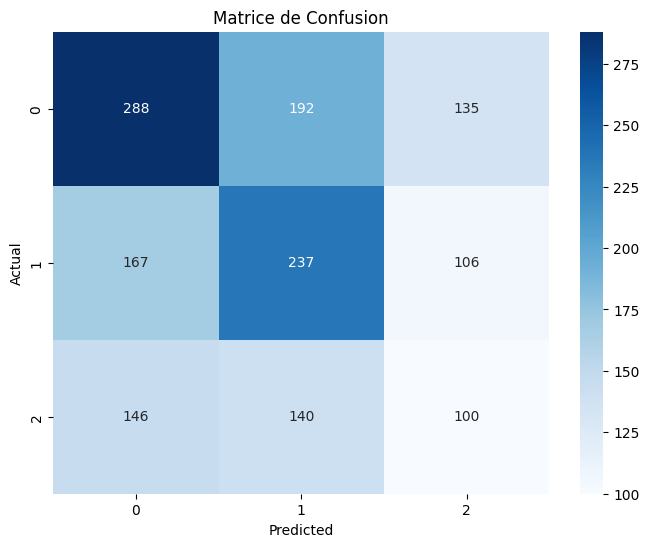

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
import scipy
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Paramètres pour la tokenisation

max_words = 10000  # Taille du vocabulaire
max_len = 150  # Longueur maximale des séquences

# Tokenisation et séquençage
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)  # Use the text data here
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)


# Construction du modèle CNN
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Conv1D(240, 7, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes : positif, neutre, négatif
])



# Compilation du modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Évaluation du modèle
y_pred = np.argmax(model.predict(X_test_pad), axis=1)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Affichage de la matrice de confusion en bleu
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matrice de Confusion")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Entraîner un modèle SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Prédiction et évaluation des performances du SVM
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Afficher les résultats du SVM
print(f"SVM Accuracy: {accuracy_svm}")
print(report_svm)

# Afficher la matrice de confusion pour le modèle SVM
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive', 'Neutre'], yticklabels=['Negative', 'Positive', 'Neutre'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()

ValueError: could not convert string to float: '3M doubles output of N95 respirator masks amid coronavirus outbreak via @nypost'

In [ ]:
# Entraîner un modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Prédiction et évaluation des performances du KNN
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Afficher les résultats du KNN
print(f"KNN Accuracy: {accuracy_knn}")
print(report_knn)

# Afficher la matrice de confusion pour le modèle KNN
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive', 'Neutre'], yticklabels=['Negative', 'Positive', 'Neutre'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.show()


ValueError: could not convert string to float: '3M doubles output of N95 respirator masks amid coronavirus outbreak via @nypost'

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.051515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 18579
[LightGBM] [Info] Number of data points in the train set: 6042, number of used features: 597
[LightGBM] [Info] Start training from score -0.939226
[LightGBM] [Info] Start training from score -0.992706
[LightGBM] [Info] Start training from score -1.433398
LightGBM Accuracy: 0.41561879549966907
              precision    recall  f1-score   support

           0       0.46      0.52      0.49       615
           1       0.40      0.53      0.45       510
           2       0.29      0.10      0.15       386

    accuracy                           0.42      1511
   macro avg       0.38      0.38      0.36      1511
weighted avg       0.39      0.42      0.39      1511



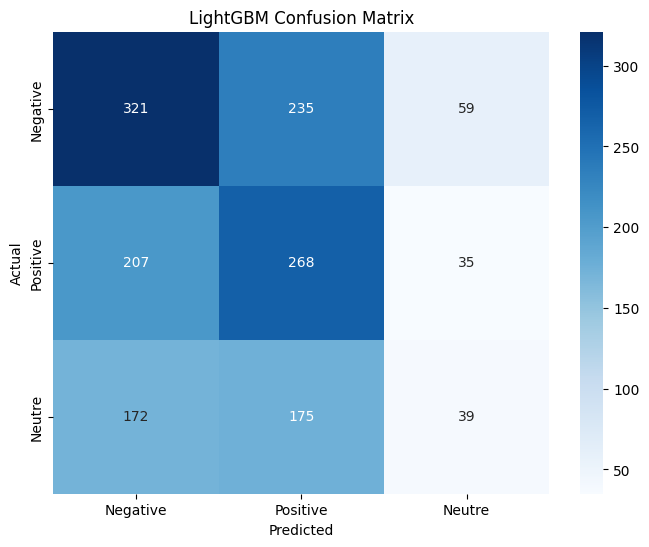

In [ ]:
import lightgbm as lgb
# Entraîner un modèle LightGBM
lgb_model = lgb.LGBMClassifier(num_leaves=31, learning_rate=0.05, n_estimators=100)
lgb_model.fit(X_train, y_train)

# Prédiction et évaluation des performances du LightGBM
y_pred_lgb = lgb_model.predict(X_test)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
report_lgb = classification_report(y_test, y_pred_lgb)
conf_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)

# Afficher les résultats du LightGBM
print(f"LightGBM Accuracy: {accuracy_lgb}")
print(report_lgb)

# Afficher la matrice de confusion pour le modèle LightGBM
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_lgb, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive', 'Neutre'], yticklabels=['Negative', 'Positive', 'Neutre'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("LightGBM Confusion Matrix")
plt.show()


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV # import GridSearchCV
import time # import time

lgbm_model = lgb.LGBMClassifier()
params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'num_leaves': [31, 50, 100]
}

grid = GridSearchCV(lgbm_model, params, cv=5)
start_time = time.time()
grid.fit(X_train, y_train)
end_time = time.time()

print("Best parameters found:", grid.best_params_)
print("Time elapsed:", end_time - start_time, "seconds")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14779
[LightGBM] [Info] Number of data points in the train set: 4833, number of used features: 478
[LightGBM] [Info] Start training from score -0.939420
[LightGBM] [Info] Start training from score -0.992135
[LightGBM] [Info] Start training from score -1.433968
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14749
[LightGBM] [Info] Number of data points in the train set: 4833, number of used features: 474
[LightGBM] [Info] Start training from score -0.939420
[LightGBM] [Info] Start training from score -0.992693
[LightGBM] [Info] Star

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import time

# Initialiser le modèle LightGBM
lgbm_model = lgb.LGBMClassifier()

# Paramètres optimisés et plus restreints pour RandomizedSearchCV
params = {
    'learning_rate': uniform(0.05, 0.15),  # Teste des valeurs entre 0.05 et 0.2
    'n_estimators': randint(50, 150),  # Nombre d'arbres entre 50 et 150
    'num_leaves': randint(20, 50),  # Nombre de feuilles entre 20 et 50
    'max_depth': randint(5, 15),  # Profondeur maximale entre 5 et 15
    'min_child_samples': randint(10, 30),  # Nombre minimum d'échantillons par feuille
    'subsample': uniform(0.7, 0.3),  # Fraction d'échantillons à utiliser pour chaque arbre
    'colsample_bytree': uniform(0.7, 0.3)  # Fraction de caractéristiques pour chaque arbre
}

# Utiliser RandomizedSearchCV avec 3 plis et 50 combinaisons aléatoires
random_search = RandomizedSearchCV(
    lgbm_model,
    params,
    n_iter=50,  # Limite à 50 combinaisons aléatoires
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1  # Utilise tous les cœurs
)

# Définir les paramètres fit_params pour LightGBM
fit_params = {
    'early_stopping_rounds': 10,
    'eval_set': [(X_test, y_test)],
    'verbose': False
}

# Entraînement avec mesure du temps d'exécution
start_time = time.time()
random_search.fit(X_train, y_train, **fit_params) # Pass fit_params here
end_time = time.time()

# Afficher les meilleurs paramètres et le temps écoulé
print("Best parameters found:", random_search.best_params_)
print("Time elapsed:", end_time - start_time, "seconds")

# Évaluer la précision sur l'ensemble de test
best_model = random_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test accuracy:", test_accuracy)

In [ ]:
y_pred_train = grid.predict(X_train)
y_pred_test = grid.predict(X_test)


Train Classiication Report:
              precision    recall  f1-score   support

           0       0.50      0.70      0.59      2362
           1       0.52      0.62      0.56      2239
           2       0.89      0.01      0.02      1441

    accuracy                           0.51      6042
   macro avg       0.63      0.45      0.39      6042
weighted avg       0.60      0.51      0.44      6042


Test Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.63      0.52       615
           1       0.40      0.50      0.45       510
           2       0.75      0.02      0.03       386

    accuracy                           0.43      1511
   macro avg       0.53      0.38      0.33      1511
weighted avg       0.51      0.43      0.37      1511



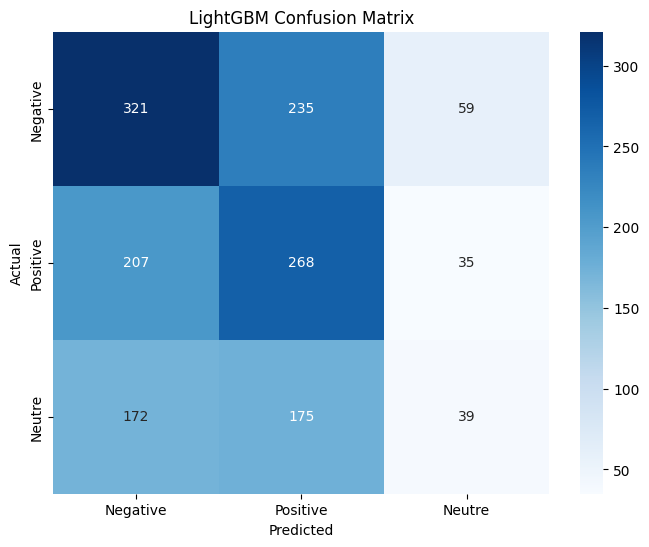

In [ ]:
print("\nTrain Classiication Report:")
print(classification_report(y_train, y_pred_train))
print("\nTest Classification Report:")
print(classification_report(y_test, y_pred_test))
# Afficher la matrice de confusion pour le modèle LightGBM
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_lgb, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive', 'Neutre'], yticklabels=['Negative', 'Positive', 'Neutre'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("LightGBM Confusion Matrix")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

model.fit(X, y)
model.score(X, y)

0.9627962399046737

In [ ]:
def evaluation(model):
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)

    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))

In [ ]:
evaluation(model)

[[289 187 139]
 [167 231 112]
 [140 131 115]]
              precision    recall  f1-score   support

           0       0.48      0.47      0.48       615
           1       0.42      0.45      0.44       510
           2       0.31      0.30      0.31       386

    accuracy                           0.42      1511
   macro avg       0.41      0.41      0.41      1511
weighted avg       0.42      0.42      0.42      1511

